In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 7 + np.random.randn(100) * 2

data = pd.DataFrame({'X': X.squeeze(), 'y': y})
data.head()


,X,y
0,3.745401,18.410298
1,9.507143,34.923414
2,7.319939,29.143340
3,5.986585,20.984617
4,1.560186,11.241215


In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred


In [36]:

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)


R²: 0.9686345415489115
RMSE: 1.6170337210052281


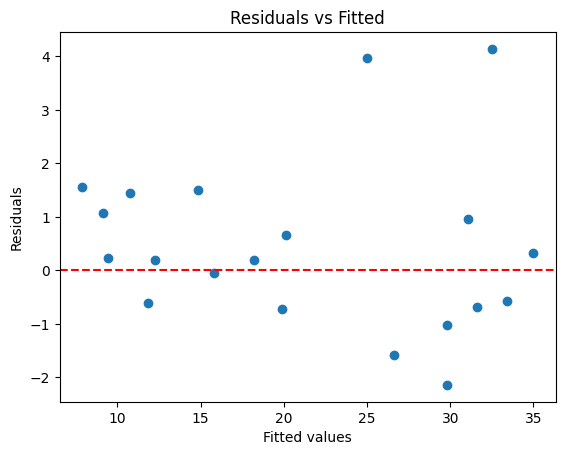

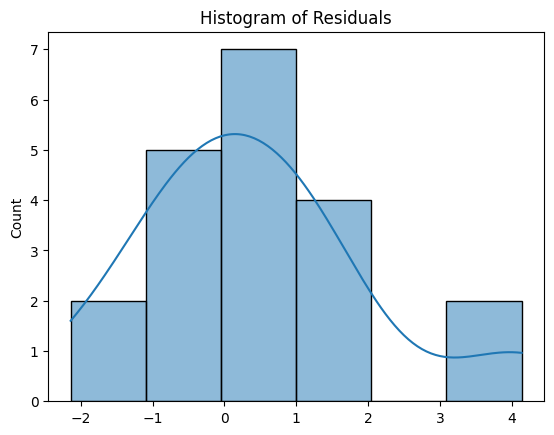

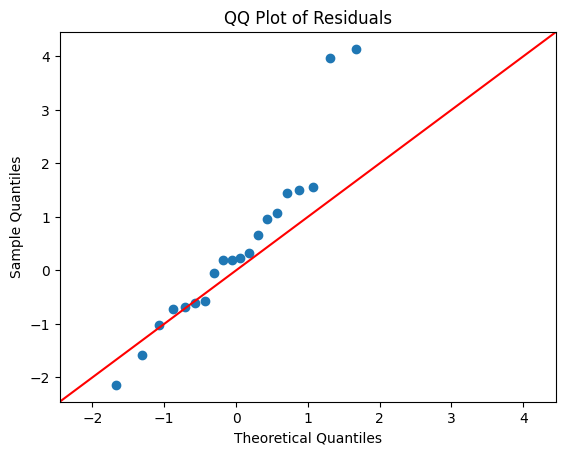

In [37]:

# Residuals vs Fitted
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# QQ plot for normality
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()


In [38]:

# Add a transformed feature: X^2
data['X2'] = data['X']**2

X_transformed = data[['X', 'X2']]
y_transformed = data['y']

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train_t, y_train_t)

y_pred_t = model2.predict(X_test_t)
r2_t = r2_score(y_test_t, y_pred_t)
rmse_t = np.sqrt(mean_squared_error(y_test_t, y_pred_t))

print("With transformed feature:")
print("R²:", r2_t)
print("RMSE:", rmse_t)


With transformed feature:
R²: 0.9694914379914089
RMSE: 1.5947922840070203
